In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('combined_data.csv')
df.head()

,sentiment,Text
0,sadness,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,happy,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

stopWords = stopwords.words("english")

def cleanText(text):
    
    output = ""
    
    
    for word in text.split():
        cleanWord = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(word))
        if cleanWord in stopWords:
            pass
        else:
            output = output + " " + cleanWord
    return output

In [4]:
df.Text = df.Text.apply(lambda x: cleanText(x))

In [5]:
from sklearn.model_selection import train_test_split

#overall train and test
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [6]:
#fear df
fearDf = df[df['sentiment'] == 'fear']

#happy df 
happyDf = df[df['sentiment'] == 'happy']


#sadness df
sadDf = df[df['sentiment'] == 'sadness']


#anger df
angerDf = df[df['sentiment'] == 'anger']


In [7]:
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

clf = svm.SVC(kernel='linear')

In [8]:
happyVsRest = pd.read_csv('combined_data.csv')

happyVsRest['sentiment'] = np.where((happyVsRest.sentiment != 'happy'),'not happy', happyVsRest.sentiment)

happyVsRest.head()

,sentiment,Text
0,not happy,@tiffanylue i know i was listenin to bad habi...
1,not happy,Layin n bed with a headache ughhhh...waitin o...
2,not happy,Funeral ceremony...gloomy friday...
3,happy,wants to hang out with friends SOON!
4,not happy,@dannycastillo We want to trade with someone w...


In [9]:
for i,s in enumerate(happyVsRest['sentiment']):
    if s == 'not happy':
        happyVsRest.loc[i,'sentiment'] = '0'
    if s == 'happy':
        happyVsRest.loc[i,'sentiment'] = '1'

In [10]:
#Non Happy vs Happy df
import time
hnh_train, hnh_test = train_test_split(happyVsRest, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(hnh_train['Text'])
test_vectors = vectorizer.transform(hnh_test['Text'])

# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear', probability = True)
t0 = time.time()
classifier_linear.fit(train_vectors, hnh_train['sentiment'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(hnh_test['sentiment'], prediction_linear, output_dict=True)
print('not happy: ', report['0'])
print('happy: ', report['1'])

Training time: 1835.984945s; Prediction time: 35.943700s
not happy:  {'precision': 0.7950749829584185, 'recall': 0.9780922431865828, 'f1-score': 0.8771385598796766, 'support': 9540}
happy:  {'precision': 0.6241007194244604, 'recall': 0.12609011627906977, 'f1-score': 0.2097944377267231, 'support': 2752}


In [11]:
#skew
happyVsRest['sentiment'].value_counts()

0    47951
1    13508
Name: sentiment, dtype: int64

In [12]:
hnh_train['sentiment'].value_counts()

0    38411
1    10756
Name: sentiment, dtype: int64

In [13]:
hnh_test['sentiment'].value_counts()

0    9540
1    2752
Name: sentiment, dtype: int64

In [14]:
#import numpy as np

classifier_linear.predict(test_vectors)

#result = np.where(arr == 1)
#print(result)

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [15]:
classifier_linear.predict_proba(test_vectors)

array([[0.82856456, 0.17143544],
       [0.80560594, 0.19439406],
       [0.88822456, 0.11177544],
       ...,
       [0.88360942, 0.11639058],
       [0.83371015, 0.16628985],
       [0.80368258, 0.19631742]])

In [16]:
fearVsRest = pd.read_csv('combined_data.csv')

fearVsRest['sentiment'] = np.where((fearVsRest.sentiment != 'fear'),'not fear', fearVsRest.sentiment)

fearVsRest.head()

,sentiment,Text
0,not fear,@tiffanylue i know i was listenin to bad habi...
1,not fear,Layin n bed with a headache ughhhh...waitin o...
2,not fear,Funeral ceremony...gloomy friday...
3,not fear,wants to hang out with friends SOON!
4,not fear,@dannycastillo We want to trade with someone w...


In [17]:
for i,s in enumerate(fearVsRest['sentiment']):
    if s == 'not fear':
        fearVsRest.loc[i,'sentiment'] = '0'
    if s == 'fear':
        fearVsRest.loc[i,'sentiment'] = '1'

In [18]:
#Non Fear vs Fear df
import time
fnf_train, fnf_test = train_test_split(fearVsRest, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(fnf_train['Text'])
test_vectors = vectorizer.transform(fnf_test['Text'])

# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear', probability = True)
t0 = time.time()
classifier_linear.fit(train_vectors, fnf_train['sentiment'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(fnf_test['sentiment'], prediction_linear, output_dict=True)
print('not fear: ', report['0'])
print('fear: ', report['1'])

Training time: 2836.219104s; Prediction time: 37.601819s
not fear:  {'precision': 0.7567336468576314, 'recall': 0.9809354910219463, 'f1-score': 0.8543708065839647, 'support': 9022}
fear:  {'precision': 0.711892797319933, 'recall': 0.12996941896024464, 'f1-score': 0.21980863718644944, 'support': 3270}


In [19]:
#skew
fearVsRest['sentiment'].value_counts()

0    45218
1    16241
Name: sentiment, dtype: int64

In [20]:
#skew
fnf_train['sentiment'].value_counts()

0    36196
1    12971
Name: sentiment, dtype: int64

In [21]:
#skew
fnf_test['sentiment'].value_counts()

0    9022
1    3270
Name: sentiment, dtype: int64

In [22]:
classifier_linear.predict(test_vectors)

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [23]:
classifier_linear.predict_proba(test_vectors)

array([[0.75428952, 0.24571048],
       [0.76354219, 0.23645781],
       [0.73119597, 0.26880403],
       ...,
       [0.75522863, 0.24477137],
       [0.73453884, 0.26546116],
       [0.79897007, 0.20102993]])

In [30]:
sadVsRest = pd.read_csv('combined_data.csv')

sadVsRest['sentiment'] = np.where((sadVsRest.sentiment != 'sadness'),'not sadness', sadVsRest.sentiment)

sadVsRest.head()

,sentiment,Text
0,sadness,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,not sadness,wants to hang out with friends SOON!
4,not sadness,@dannycastillo We want to trade with someone w...


In [33]:
for i,s in enumerate(sadVsRest['sentiment']):
    if s == 'not sadness':
        sadVsRest.loc[i,'sentiment'] = '0'
    if s == 'sadness':
        sadVsRest.loc[i,'sentiment'] = '1'

In [37]:
#Non Sadness vs Sadness df
sns_train, sns_test = train_test_split(sadVsRest, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(sns_train['Text'])
test_vectors = vectorizer.transform(sns_test['Text'])

# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear', probability = True)
t0 = time.time()
classifier_linear.fit(train_vectors, sns_train['sentiment'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(sns_test['sentiment'], prediction_linear, output_dict=True)
print('not sadness: ', report['0'])
print('sadness: ', report['1'])

Training time: 2042.213552s; Prediction time: 25.836786s
not sadness:  {'precision': 0.8498290669557241, 'recall': 0.9852102464958917, 'f1-score': 0.9125257408899633, 'support': 10345}
sadness:  {'precision': 0.4882943143812709, 'recall': 0.07498715973292244, 'f1-score': 0.13000890471950133, 'support': 1947}


In [38]:
sadVsRest['sentiment'].value_counts()

0    51663
1     9796
Name: sentiment, dtype: int64

In [39]:
sns_train['sentiment'].value_counts()

0    41318
1     7849
Name: sentiment, dtype: int64

In [40]:
sns_test['sentiment'].value_counts()

0    10345
1     1947
Name: sentiment, dtype: int64

In [41]:
classifier_linear.predict(test_vectors)

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [42]:
classifier_linear.predict_proba(test_vectors)

array([[0.48290831, 0.51709169],
       [0.84903321, 0.15096679],
       [0.87472023, 0.12527977],
       ...,
       [0.83823718, 0.16176282],
       [0.90115009, 0.09884991],
       [0.89518101, 0.10481899]])

In [31]:
angerVsRest = pd.read_csv('combined_data.csv')

angerVsRest['sentiment'] = np.where((angerVsRest.sentiment != 'anger'),'not anger', angerVsRest.sentiment)

angerVsRest.head()

,sentiment,Text
0,not anger,@tiffanylue i know i was listenin to bad habi...
1,not anger,Layin n bed with a headache ughhhh...waitin o...
2,not anger,Funeral ceremony...gloomy friday...
3,not anger,wants to hang out with friends SOON!
4,not anger,@dannycastillo We want to trade with someone w...


In [32]:
for i,s in enumerate(angerVsRest['sentiment']):
    if s == 'not anger':
        angerVsRest.loc[i,'sentiment'] = '0'
    if s == 'anger':
        angerVsRest.loc[i,'sentiment'] = '1'

In [ ]:
ana_train, ana_test = train_test_split(angerVsRest, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(ana_train['Text'])
test_vectors = vectorizer.transform(ana_test['Text'])

# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear', probability = True)
t0 = time.time()
classifier_linear.fit(train_vectors, ana_train['sentiment'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(ana_test['sentiment'], prediction_linear, output_dict=True)

print('not anger: ', report['0'])
print('anger: ', report['1'])

In [ ]:
angerVsRest['sentiment'].value_counts()

In [ ]:
ana_train['sentiment'].value_counts()

In [ ]:
ana_test['sentiment'].value_counts()

In [ ]:
classifier_linear.predict(test_vectors)

In [ ]:
classifier_linear.predict_proba(test_vectors)

In [34]:
for i,s in enumerate(df['sentiment']):
    if s == 'happy':
        df.loc[i,'sentiment'] = '1'
    if s == 'fear':
        df.loc[i,'sentiment'] = '2'
    if s == 'sadness':
        df.loc[i,'sentiment'] = '3'
    if s == 'neutral':
        df.loc[i,'sentiment'] = '4'
    if s == 'love':
        df.loc[i,'sentiment'] = '5'
    if s == 'anger':
        df.loc[i,'sentiment'] = '6'
    if s == 'surprise':
        df.loc[i,'sentiment'] = '7'
    if s == 'relief':
        df.loc[i,'sentiment'] = '8'

#1.4.1.1. Multi-class classification
#SVC and NuSVC implement the “one-versus-one” approach for multi-class classification. 
#In total, n_classes * (n_classes - 1) / 2 classifiers are constructed and each one trains data from two classes. 
#To provide a consistent interface with other classifiers, the decision_function_shape option allows to 
#monotonically transform the results of the “one-versus-one” classifiers to a “one-vs-rest” decision 
#function of shape (n_samples, n_classes).

#We have 8 Classes ==> 8*(8-1)/2 = 28 classifiers.

X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors_ovo = vectorizer.fit_transform(X_train['Text'])
test_vectors_ovo = vectorizer.transform(X_test['Text'])

classifier_ovo = svm.SVC(decision_function_shape='ovo')
t0 = time.time()
classifier_ovo.fit(train_vectors_ovo, X_train['sentiment'])
t1 = time.time()
#svm.SVC(decision_function_shape='ovo')
prediction_ovo = classifier_ovo.predict(test_vectors_ovo)
t2 = time.time()
time_ovo_train = t1-t0
time_ovo_predict = t2-t1

print("Training time: %fs; Prediction time: %fs" % (time_ovo_train, time_ovo_predict))
report = classification_report(X_test['sentiment'], prediction_ovo, output_dict=True)
print('happy: ', report['1'])
print('fear: ', report['2'])
print('sadness: ', report['3'])
print('neutral: ', report['4'])
print('love: ', report['5'])
print('anger: ', report['6'])
print('surprise: ', report['7'])
print('relief: ', report['8'])


#dec = classifier_multi.decision_function([[1]])
#dec.shape[1] # 4 classes: 4*3/2 = 6

#clf.decision_function_shape = "ovr"
#dec = clf.decision_function([[1]])
#dec.shape[1] # 4 classes

Training time: 874.402996s; Prediction time: 58.871242s
happy:  {'precision': 0.4421117628897808, 'recall': 0.5203488372093024, 'f1-score': 0.4780504089467535, 'support': 2752}
fear:  {'precision': 0.3843401389181225, 'recall': 0.5584097859327217, 'f1-score': 0.45530482483480866, 'support': 3270}
sadness:  {'precision': 0.4574290484140234, 'recall': 0.2814586543400103, 'f1-score': 0.34848966613672494, 'support': 1947}
neutral:  {'precision': 0.3615794143744454, 'recall': 0.46359499431171786, 'f1-score': 0.40628115653040875, 'support': 1758}
love:  {'precision': 0.532608695652174, 'recall': 0.3049792531120332, 'f1-score': 0.3878627968337731, 'support': 964}
anger:  {'precision': 0.5269230769230769, 'recall': 0.17407878017789072, 'f1-score': 0.2617000955109838, 'support': 787}
surprise:  {'precision': 0.3333333333333333, 'recall': 0.019762845849802372, 'f1-score': 0.0373134328358209, 'support': 506}
relief:  {'precision': 0.25, 'recall': 0.006493506493506494, 'f1-score': 0.01265822784810

In [36]:
classifier_ovo.predict(test_vectors_ovo)

array(['3', '1', '6', ..., '2', '2', '4'], dtype=object)

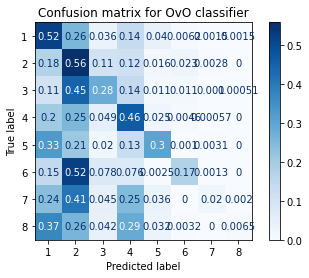

In [50]:
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
matrix = plot_confusion_matrix(classifier_ovo, test_vectors_ovo, X_test['sentiment'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for OvO classifier')
plt.show(matrix)
plt.show()

In [96]:
# Plot decision boundary
import numpy as np
import pandas as pd

np_arr = X_test.values

length = len(np_arr)

b = [float(x) for x in np_arr[:,0]]

plot_decision_regions(np_arr, b[:,0], clf=classifier_ovo, legend=2)
plt.show()

TypeError: list indices must be integers or slices, not tuple

In [95]:
np_arr = X_test.values

length = len(np_arr)

b = [float(x) for x in np_arr[:,0]]
print(b[0])

2.0
